In [1]:
# 1. Preparación de Datos

In [2]:
## Carga de paquetes 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Carga de datos
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')

df = pd.read_csv('TelecomX_datos_limpios.csv')
print(f'Dimensiones del dataset: {df.shape[0]} filas x {df.shape[1]} columnas')
df.head()

Dimensiones del dataset: 7043 filas x 24 columnas


,ID_Cliente,Churn,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet,...,TV_Streaming,Peliculas_Streaming,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargo_Mensual,Cargo_Total,Cargo_Diario,Cantidad_Servicios,Rango_Tenure
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,3,7-12 meses
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,2,7-12 meses
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,1,0-6 meses
3,0011-IGKFF,Yes,Male,Sí,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,4,13-24 meses
4,0013-EXCHZ,Yes,Female,Sí,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,2,0-6 meses


In [3]:
## Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7043 non-null   object 
 1   Churn                   7043 non-null   object 
 2   Genero                  7043 non-null   object 
 3   Adulto_Mayor            7043 non-null   object 
 4   Tiene_Pareja            7043 non-null   object 
 5   Tiene_Dependientes      7043 non-null   object 
 6   Meses_Contrato          7043 non-null   int64  
 7   Servicio_Telefonico     7043 non-null   object 
 8   Multiples_Lineas        7043 non-null   object 
 9   Servicio_Internet       7043 non-null   object 
 10  Seguridad_Online        7043 non-null   object 
 11  Respaldo_Online         7043 non-null   object 
 12  Proteccion_Dispositivo  7043 non-null   object 
 13  Soporte_Tecnico         7043 non-null   object 
 14  TV_Streaming            7043 non-null   

In [4]:
# Verificar valores nulos
nulos = df.isnull().sum()
nulos[nulos > 0]

Rango_Tenure    11
dtype: int64

In [5]:
# Eliminar columnas irrelevantes
columnas_eliminar = ['ID_Cliente', 'Rango_Tenure']
df = df.drop(columns=columnas_eliminar)
print(f'Columnas restantes: {df.shape[1]}')
print(list(df.columns))

Columnas restantes: 22
['Churn', 'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Meses_Contrato', 'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Factura_Digital', 'Metodo_Pago', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario', 'Cantidad_Servicios']


In [6]:
# Encoding de variables categóricas

# Estandarizar Adulto_Mayor: 'Sí' -> 'Yes', 'No' -> 'No'
df['Adulto_Mayor'] = df['Adulto_Mayor'].replace({'Sí': 'Yes'})

# Codificación binaria para la variable objetivo
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Variables binarias (Yes/No) -> 1/0
cols_binarias = [
    'Genero', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes',
    'Servicio_Telefonico', 'Factura_Digital'
]

mapeo_binario = {
    'Genero': {'Male': 1, 'Female': 0},
    'Adulto_Mayor': {'Yes': 1, 'No': 0},
    'Tiene_Pareja': {'Yes': 1, 'No': 0},
    'Tiene_Dependientes': {'Yes': 1, 'No': 0},
    'Servicio_Telefonico': {'Yes': 1, 'No': 0},
    'Factura_Digital': {'Yes': 1, 'No': 0},
}

for col, mapeo in mapeo_binario.items():
    df[col] = df[col].map(mapeo)

print('Variables binarias codificadas correctamente.')
df[cols_binarias].head()

Variables binarias codificadas correctamente.


,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Servicio_Telefonico,Factura_Digital
0,0,0,1,1,1,1
1,1,0,0,0,1,0
2,1,0,0,0,1,1
3,1,1,1,0,1,1
4,0,1,1,0,1,1


In [7]:
# One-Hot Encoding para variables categóricas con múltiples categorías
cols_onehot = [
    'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
    'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
    'TV_Streaming', 'Peliculas_Streaming', 'Tipo_Contrato', 'Metodo_Pago'
]

df = pd.get_dummies(df, columns=cols_onehot, drop_first=True, dtype=int)

print(f'Dimensiones después del encoding: {df.shape}')
print(f'\nColumnas resultantes ({df.shape[1]}):')
for i, col in enumerate(df.columns):
    print(f'  {i+1}. {col}')

Dimensiones después del encoding: (7043, 33)

Columnas resultantes (33):
  1. Churn
  2. Genero
  3. Adulto_Mayor
  4. Tiene_Pareja
  5. Tiene_Dependientes
  6. Meses_Contrato
  7. Servicio_Telefonico
  8. Factura_Digital
  9. Cargo_Mensual
  10. Cargo_Total
  11. Cargo_Diario
  12. Cantidad_Servicios
  13. Multiples_Lineas_No phone service
  14. Multiples_Lineas_Yes
  15. Servicio_Internet_Fiber optic
  16. Servicio_Internet_No
  17. Seguridad_Online_No internet service
  18. Seguridad_Online_Yes
  19. Respaldo_Online_No internet service
  20. Respaldo_Online_Yes
  21. Proteccion_Dispositivo_No internet service
  22. Proteccion_Dispositivo_Yes
  23. Soporte_Tecnico_No internet service
  24. Soporte_Tecnico_Yes
  25. TV_Streaming_No internet service
  26. TV_Streaming_Yes
  27. Peliculas_Streaming_No internet service
  28. Peliculas_Streaming_Yes
  29. Tipo_Contrato_One year
  30. Tipo_Contrato_Two year
  31. Metodo_Pago_Credit card (automatic)
  32. Metodo_Pago_Electronic check
  33. 

In [8]:
# Validar que no quedan variables categóricas
cats_restantes = df.select_dtypes(include='object').columns.tolist()
print(f'Variables categóricas restantes: {cats_restantes if cats_restantes else "Ninguna"}')
print(f'\nTipos de datos:\n{df.dtypes.value_counts()}')

Variables categóricas restantes: Ninguna

Tipos de datos:
int64      30
float64     3
Name: count, dtype: int64


=== Distribución de Churn ===
No cancelaron (0): 5,174 clientes (73.5%)
Cancelaron (1):    1,869 clientes (26.5%)

Ratio desbalance: 2.77:1


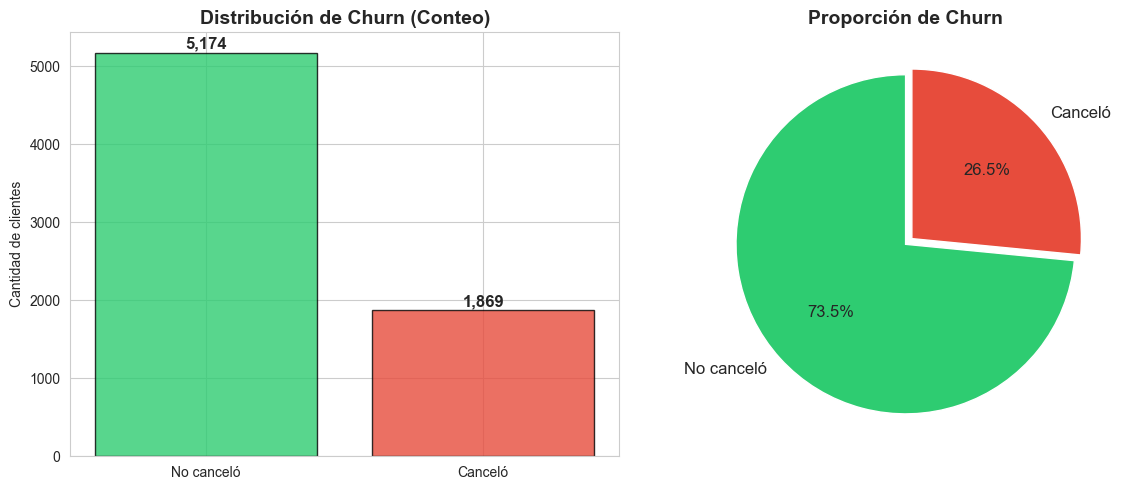


Conclusión: Existe un desbalance moderado (26.5% vs 73.5%).
Es recomendable aplicar técnicas de balanceo para mejorar la predicción de la clase minoritaria.


In [9]:
# 1.4 Vaerificación de cancelación
# Proporción de cancelación
churn_counts = df['Churn'].value_counts()
churn_prop = df['Churn'].value_counts(normalize=True) * 100

print('=== Distribución de Churn ===')
print(f'No cancelaron (0): {churn_counts[0]:,} clientes ({churn_prop[0]:.1f}%)')
print(f'Cancelaron (1):    {churn_counts[1]:,} clientes ({churn_prop[1]:.1f}%)')
print(f'\nRatio desbalance: {churn_counts[0]/churn_counts[1]:.2f}:1')

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

colors = ['#2ecc71', '#e74c3c']
labels = ['No canceló', 'Canceló']

# Gráfico de barras
axes[0].bar(labels, churn_counts.values, color=colors, edgecolor='black', alpha=0.8)
for i, v in enumerate(churn_counts.values):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold', fontsize=12)
axes[0].set_title('Distribución de Churn (Conteo)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cantidad de clientes')

# Gráfico de torta
axes[1].pie(churn_counts.values, labels=labels, autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0, 0.05),
            textprops={'fontsize': 12})
axes[1].set_title('Proporción de Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('01_distribucion_churn.png', bbox_inches='tight', dpi=150)
plt.show()

print(f'\nConclusión: Existe un desbalance moderado ({churn_prop[1]:.1f}% vs {churn_prop[0]:.1f}%).'
      f'\nEs recomendable aplicar técnicas de balanceo para mejorar la predicción de la clase minoritaria.')



### 1.5 Balanceo de Clases con SMOTE

Aplicamos **SMOTE (Synthetic Minority Over-sampling Technique)** para generar ejemplos sintéticos de la clase minoritaria (Churn = 1). Esto se aplica **únicamente sobre los datos de entrenamiento** para evitar data leakage.

**Nota**: El balanceo se aplicará después de la separación train/test (sección 3.1) para mantener la integridad de la evaluación.

### 1.6 Normalización / Estandarización

La decisión de normalizar depende del modelo:

| Modelo | Requiere normalización | Razón |
|--------|----------------------|-------|
| **Regresión Logística** | Sí | Sensible a la escala; los coeficientes se ven afectados por la magnitud de las variables |
| **Random Forest** | No | Basado en árboles de decisión; las divisiones no dependen de la escala |

Utilizare **StandardScaler** (estandarización Z-score) para la Regresión Logística, aplicado **después de la separación train/test** usando `fit_transform` solo en entrenamiento y `transform` en prueba para evitar data leakage.

---
## 2. Correlación y Selección de Variables

### 2.1 Matriz de Correlación

In [12]:
# Matriz de correlación completa
corr_matrix = df.corr()

# Correlaciones con Churn (ordenadas por valor absoluto)
corr_churn = corr_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)

print('=== Top 15 variables más correlacionadas con Churn ===')
for var, val in corr_churn.head(15).items():
    signo = '+' if val > 0 else '-'
    print(f'  {signo} {var:45s} {val:+.4f}')

=== Top 15 variables más correlacionadas con Churn ===
  - Meses_Contrato                                -0.3522
  + Servicio_Internet_Fiber optic                 +0.3080
  - Tipo_Contrato_Two year                        -0.3023
  + Metodo_Pago_Electronic check                  +0.3019
  - Proteccion_Dispositivo_No internet service    -0.2279
  - Respaldo_Online_No internet service           -0.2279
  - Servicio_Internet_No                          -0.2279
  - Seguridad_Online_No internet service          -0.2279
  - Peliculas_Streaming_No internet service       -0.2279
  - Soporte_Tecnico_No internet service           -0.2279
  - TV_Streaming_No internet service              -0.2279
  - Cargo_Total                                   -0.1983
  + Cargo_Mensual                                 +0.1934
  + Cargo_Diario                                  +0.1934
  + Factura_Digital                               +0.1918


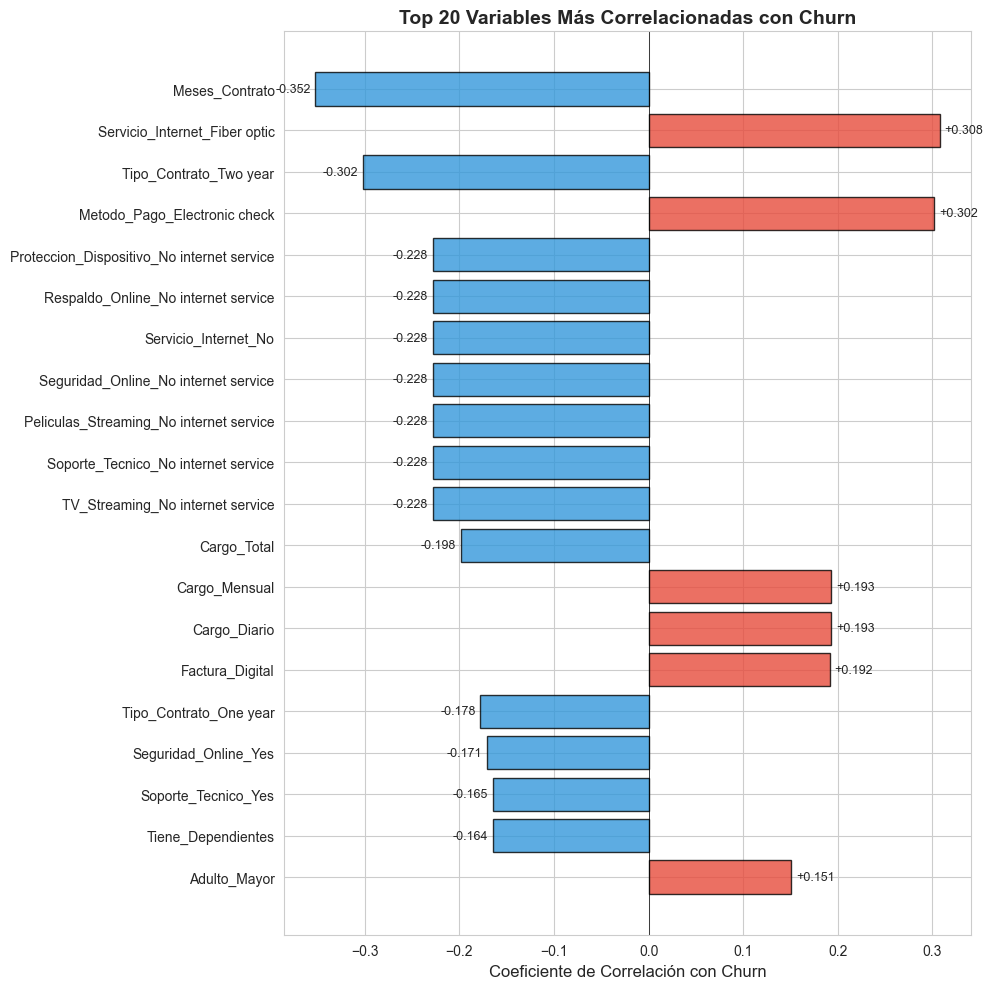

In [13]:
# Visualización: Correlación con Churn
fig, ax = plt.subplots(figsize=(10, 10))

top_corr = corr_churn.head(20)
colores = ['#e74c3c' if v > 0 else '#3498db' for v in top_corr.values]

bars = ax.barh(range(len(top_corr)), top_corr.values, color=colores, edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels(top_corr.index, fontsize=10)
ax.set_xlabel('Coeficiente de Correlación con Churn', fontsize=12)
ax.set_title('Top 20 Variables Más Correlacionadas con Churn', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
ax.invert_yaxis()

# Añadir valores
for i, v in enumerate(top_corr.values):
    ax.text(v + (0.005 if v >= 0 else -0.005), i, f'{v:+.3f}',
            va='center', ha='left' if v >= 0 else 'right', fontsize=9)

plt.tight_layout()
plt.savefig('02_correlacion_churn.png', bbox_inches='tight', dpi=150)
plt.show()

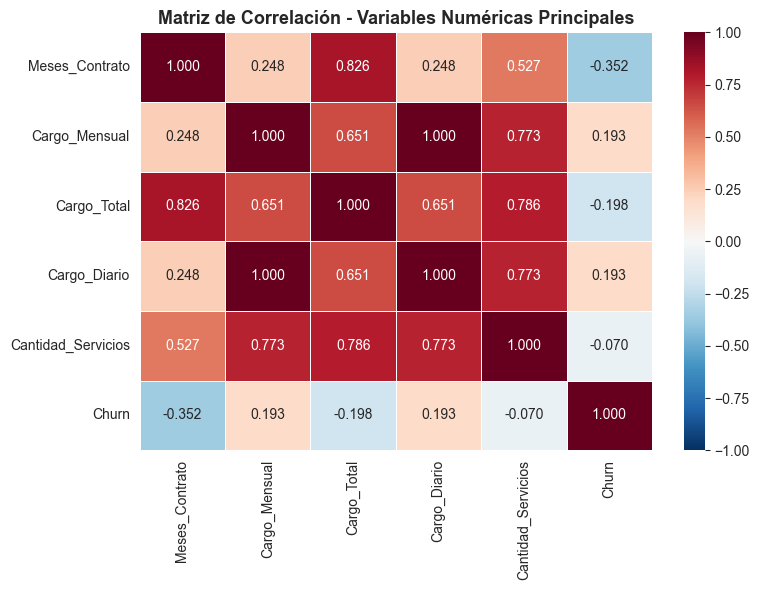

In [14]:
# Heatmap de correlación para las variables numéricas principales
cols_numericas = ['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total', 'Cargo_Diario',
                  'Cantidad_Servicios', 'Churn']

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(df[cols_numericas].corr(), annot=True, cmap='RdBu_r', center=0,
            fmt='.3f', linewidths=0.5, ax=ax, vmin=-1, vmax=1)
ax.set_title('Matriz de Correlación - Variables Numéricas Principales', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig('03_heatmap_correlacion.png', bbox_inches='tight', dpi=150)
plt.show()

### 2.2 Análisis Dirigido: Variables Clave vs Churn

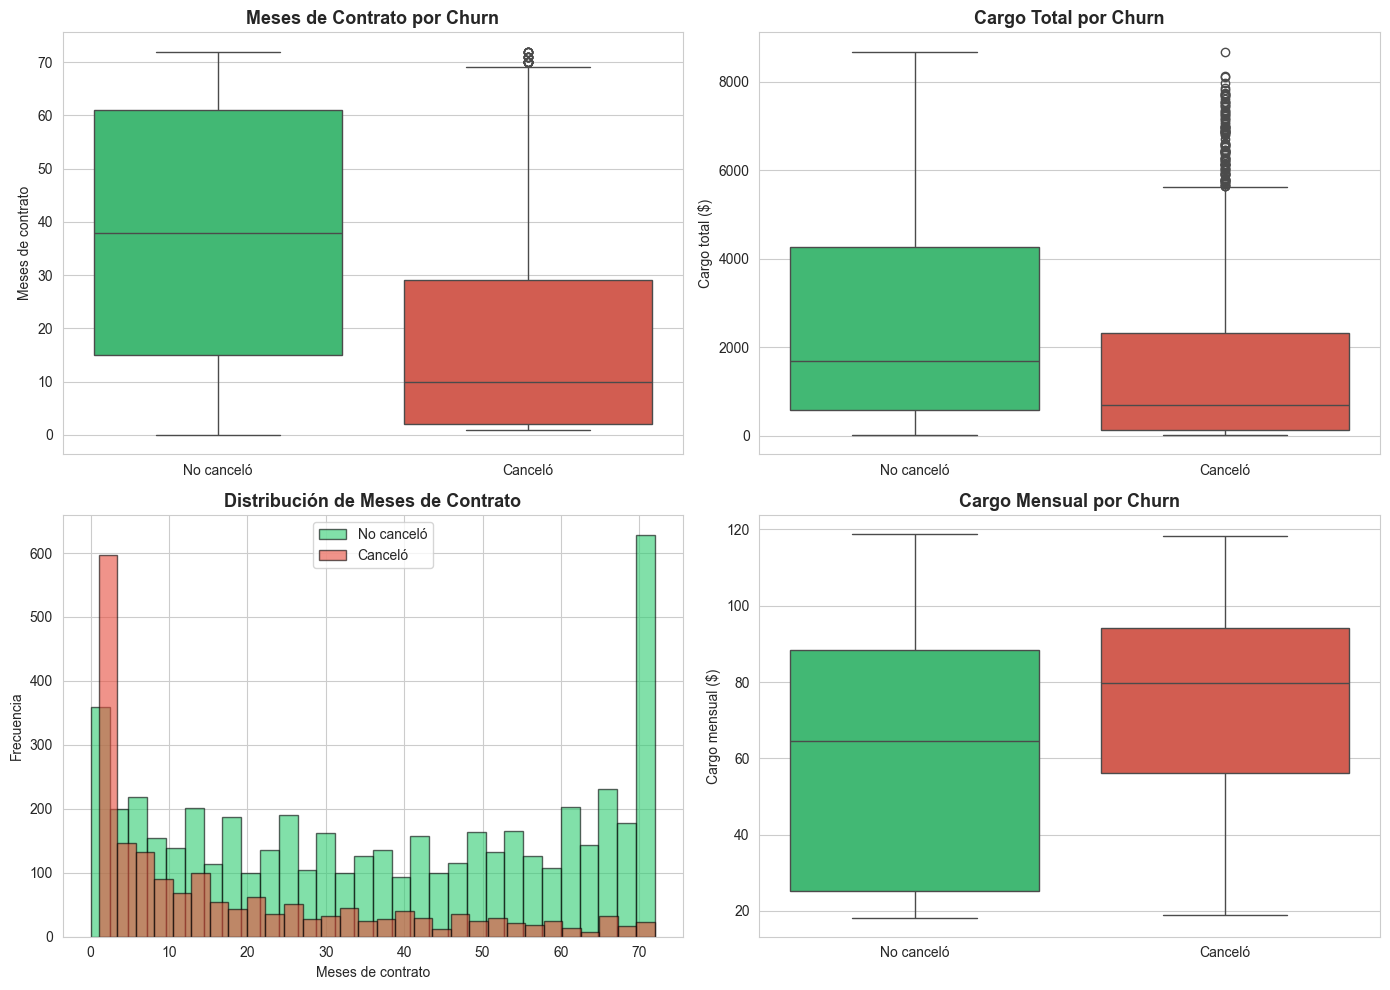

=== Estadísticas por grupo de Churn ===
           Meses_Contrato        Cargo_Mensual        Cargo_Total         
                     mean median          mean median        mean   median
No canceló          37.57   38.0         61.27  64.43      2550.0  1679.52
Canceló             17.98   10.0         74.44  79.65      1531.8   703.55


In [15]:
# Análisis dirigido: Tiempo de contrato y Gasto total vs Churn
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

churn_labels = {0: 'No canceló', 1: 'Canceló'}

# 1. Boxplot: Meses_Contrato vs Churn
df_plot = df.copy()
df_plot['Churn_label'] = df_plot['Churn'].map(churn_labels)

sns.boxplot(data=df_plot, x='Churn_label', y='Meses_Contrato', palette=colors, ax=axes[0, 0])
axes[0, 0].set_title('Meses de Contrato por Churn', fontsize=13, fontweight='bold')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Meses de contrato')

# 2. Boxplot: Cargo_Total vs Churn
sns.boxplot(data=df_plot, x='Churn_label', y='Cargo_Total', palette=colors, ax=axes[0, 1])
axes[0, 1].set_title('Cargo Total por Churn', fontsize=13, fontweight='bold')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Cargo total ($)')

# 3. Histograma: Meses_Contrato por Churn
for churn_val, label, color in [(0, 'No canceló', '#2ecc71'), (1, 'Canceló', '#e74c3c')]:
    subset = df[df['Churn'] == churn_val]['Meses_Contrato']
    axes[1, 0].hist(subset, bins=30, alpha=0.6, label=label, color=color, edgecolor='black')
axes[1, 0].set_title('Distribución de Meses de Contrato', fontsize=13, fontweight='bold')
axes[1, 0].set_xlabel('Meses de contrato')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].legend()

# 4. Boxplot: Cargo_Mensual vs Churn
sns.boxplot(data=df_plot, x='Churn_label', y='Cargo_Mensual', palette=colors, ax=axes[1, 1])
axes[1, 1].set_title('Cargo Mensual por Churn', fontsize=13, fontweight='bold')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Cargo mensual ($)')

plt.tight_layout()
plt.savefig('04_analisis_dirigido.png', bbox_inches='tight', dpi=150)
plt.show()

# Estadísticas por grupo
print('=== Estadísticas por grupo de Churn ===')
stats = df.groupby('Churn')[['Meses_Contrato', 'Cargo_Mensual', 'Cargo_Total']].agg(['mean', 'median'])
stats.index = ['No canceló', 'Canceló']
print(stats.round(2))

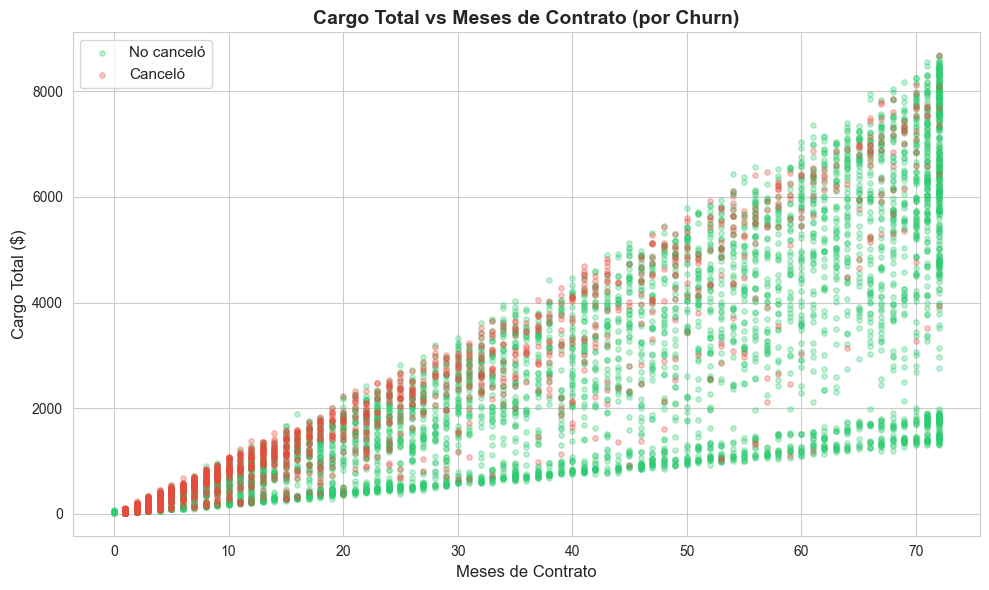

Observación: Los clientes que cancelan tienden a tener contratos más cortos y cargos totales menores.
Los clientes leales se concentran en periodos largos con acumulación progresiva de gasto.


In [16]:
# Scatter plot: Cargo_Total vs Meses_Contrato coloreado por Churn
fig, ax = plt.subplots(figsize=(10, 6))

for churn_val, label, color in [(0, 'No canceló', '#2ecc71'), (1, 'Canceló', '#e74c3c')]:
    subset = df[df['Churn'] == churn_val]
    ax.scatter(subset['Meses_Contrato'], subset['Cargo_Total'],
               alpha=0.3, label=label, color=color, s=15)

ax.set_xlabel('Meses de Contrato', fontsize=12)
ax.set_ylabel('Cargo Total ($)', fontsize=12)
ax.set_title('Cargo Total vs Meses de Contrato (por Churn)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)

plt.tight_layout()
plt.savefig('05_scatter_cargo_meses.png', bbox_inches='tight', dpi=150)
plt.show()

print('Observación: Los clientes que cancelan tienden a tener contratos más cortos y cargos totales menores.\n'
      'Los clientes leales se concentran en periodos largos con acumulación progresiva de gasto.')

---
## 3. Modelado Predictivo

### 3.1 Separación de Datos (Train / Test)

Dividimos 80% para entrenamiento y 20% para prueba, con estratificación para mantener la proporción de clases.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separar features y target
X = df.drop(columns=['Churn'])
y = df['Churn']

# División 80/20 estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Conjunto de prueba:        {X_test.shape[0]} muestras')
print(f'Features:                  {X_train.shape[1]}')
print(f'\nProporción Churn en train: {y_train.value_counts(normalize=True)[1]:.1%}')
print(f'Proporción Churn en test:  {y_test.value_counts(normalize=True)[1]:.1%}')

Conjunto de entrenamiento: 5634 muestras
Conjunto de prueba:        1409 muestras
Features:                  32

Proporción Churn en train: 26.5%
Proporción Churn en test:  26.5%


### 3.2 Balanceo con SMOTE (solo en entrenamiento)

Aplicamos SMOTE únicamente sobre los datos de entrenamiento para evitar data leakage. El conjunto de prueba permanece intacto y refleja la distribución real.

In [18]:
# Aplicar SMOTE solo en datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print('=== Antes del balanceo (train) ===')
print(y_train.value_counts().to_string())
print(f'\n=== Después del balanceo con SMOTE (train) ===')
print(pd.Series(y_train_bal).value_counts().to_string())
print(f'\nMuestras sintéticas generadas: {len(y_train_bal) - len(y_train)}')

=== Antes del balanceo (train) ===
Churn
0    4139
1    1495

=== Después del balanceo con SMOTE (train) ===
Churn
0    4139
1    4139

Muestras sintéticas generadas: 2644


### 3.3 Normalización para Regresión Logística

La Regresión Logística es sensible a la escala de los datos porque optimiza coeficientes mediante gradiente descendente. Variables con magnitudes muy diferentes (e.g., `Cargo_Total` en miles vs `Adulto_Mayor` binario) pueden sesgar los coeficientes y dificultar la convergencia.

Aplicamos **StandardScaler** (Z-score: media=0, desviación=1):
- `fit_transform` en entrenamiento: Calcula media/desviación y transforma
- `transform` en prueba: Usa las estadísticas del entrenamiento (evita data leakage)

In [19]:
# Estandarización para Regresión Logística
scaler = StandardScaler()

# Fit solo en entrenamiento balanceado, transform en ambos
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

# Convertir a DataFrame para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_bal.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print('Estadísticas después de la estandarización (entrenamiento):')
print(f'  Media (aprox):      {X_train_scaled.mean().mean():.6f}')
print(f'  Desv. est. (aprox): {X_train_scaled.std().mean():.6f}')

Estadísticas después de la estandarización (entrenamiento):
  Media (aprox):      0.000000
  Desv. est. (aprox): 1.000060


### 3.4 Creación de Modelos

Entrenamos dos modelos con características complementarias:

1. **Regresión Logística** (con datos normalizados): Modelo lineal interpretable, sensible a la escala.
2. **Random Forest** (sin normalización): Modelo basado en árboles, robusto a la escala y capaz de capturar relaciones no lineales.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

# --- Modelo 1: Regresión Logística (datos escalados) ---
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train_bal)

y_pred_lr = lr_model.predict(X_test_scaled)
print('Regresión Logística entrenada correctamente.')

# --- Modelo 2: Random Forest (datos sin escalar) ---
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_bal, y_train_bal)

y_pred_rf = rf_model.predict(X_test)
print('Random Forest entrenado correctamente.')

Regresión Logística entrenada correctamente.
Random Forest entrenado correctamente.
